# Week4授業課題1 アヤメの分類

## 【課題1】練習のために特徴量とカテゴリを選択

選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

virgicolorとvirginica  
sepal_lengthとpetal_length

In [117]:
from sklearn.datasets import load_iris
a = load_iris()

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [119]:
X = pd.DataFrame(a.data,columns=["sepal_length","sepal_width","petal_length","petal_width"])
y = pd.DataFrame(a.target,columns=["Species"])

df = pd.concat([X,y],axis=1)

In [121]:
#a = [1,2]
#df_02= df.query("Species ==1")
#df_02= df.("Species ==1")
df_02=df[df["Species"] .isin([1,2])][['sepal_length','petal_length','Species']]
                #[['sepal_length','petal_length','Species']]
#df.query("Species =={}
display(df_02.head())
# 一文で書けないのか・・？かけた

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1


# 【問題2】データの分析

抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください

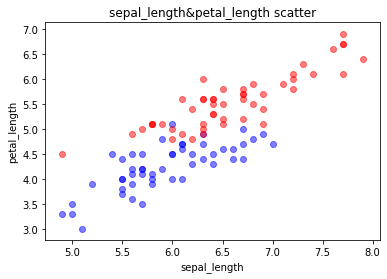

In [122]:
sepal_length = df.sepal_length
petal_length = df.petal_length

plt.title("sepal_length&petal_length scatter")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")

#データ
plt.scatter(sepal_length[df["Species"].isin([1])],petal_length[df["Species"].isin([1])],c ="b",alpha= "0.5")
plt.scatter(sepal_length[df["Species"].isin([2])],petal_length[df["Species"].isin([2])],c ="r",alpha= "0.5")

#plt.scatter(petal_width,sepal_length,c ="g",alpha = "0.1")

plt.show()

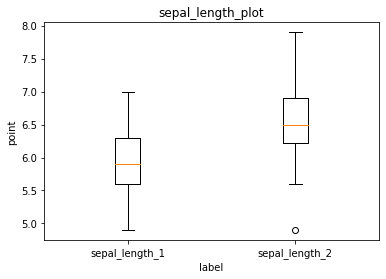

In [123]:
# 箱ひげ図

sepal_length_1 =  sepal_length[df["Species"].isin([1])]
sepal_length_2 =  sepal_length[df["Species"].isin([2])]


sepal_length_12 = (sepal_length_1,sepal_length_2)

#箱ひげ図　return = 図(fig),配列(ax)
fig, ax = plt.subplots()

#boxplotの各コンポーネントを、matplotlib.lines.Line2D作成されたインスタンスのリストにマッピングする辞書。
di = ax.boxplot(sepal_length_12)
ax.set_xticklabels(["sepal_length_1","sepal_length_2"])

plt.title('sepal_length_plot')
plt.xlabel('label')
plt.ylabel('point')


plt.show()

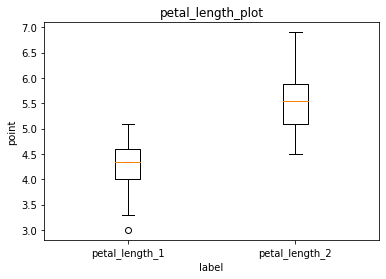

In [124]:
# 箱ひげ図

petal_length_1 =  petal_length[df["Species"].isin([1])]
petal_length_2 =  petal_length[df["Species"].isin([2])]


petal_length_12 = (petal_length_1,petal_length_2)

#箱ひげ図　return = 図(fig),配列(ax)
fig, ax = plt.subplots()

#boxplotの各コンポーネントを、matplotlib.lines.Line2D作成されたインスタンスのリストにマッピングする辞書。
di = ax.boxplot(petal_length_12)
ax.set_xticklabels(["petal_length_1","petal_length_2"])

plt.title('petal_length_plot')
plt.xlabel('label')
plt.ylabel('point')


plt.show()

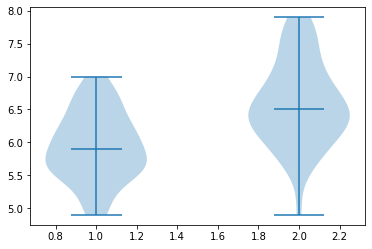

In [37]:
plt.violinplot(sepal_length_12,showmedians=True)
plt.show()

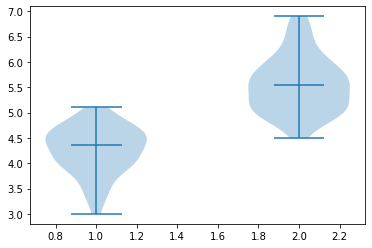

In [38]:
plt.violinplot(petal_length_12,showmedians=True)
plt.show()

# 【問題3】前処理・訓練用データと検証用データの分割

In [125]:
X_all = df_02.values
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
5             5.4          3.9           1.7          0.4
6             4.6          3.4           1.4          0.3
7             5.0          3.4           1.5          0.2
8             4.4          2.9           1.4          0.2
9             4.9          3.1           1.5          0.1
10            5.4          3.7           1.5          0.2
11            4.8          3.4           1.6          0.2
12            4.8          3.0           1.4          0.1
13            4.3          3.0           1.1          0.1
14            5.8          4.0           1.2          0.2
15            5.7          4.4           1.5          0.4
16            

In [126]:
from sklearn.model_selection import train_test_split

In [162]:
display(df_02.iloc[:, :2].head())

,sepal_length,petal_length
50,7.0,4.7
51,6.4,4.5
52,6.9,4.9
53,5.5,4.0
54,6.5,4.6


In [163]:
display(df_02.iloc[:, 2:].head())

,Species
50,1
51,1
52,1
53,1
54,1


In [161]:
X=X_all[:,:2]

In [164]:
#print(X)

In [147]:
X.shape

(100, 2)

In [148]:
print(X_all[:,2])
y = X_all[:,2]
y.shape

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2.]


(100,)

In [233]:
display(df_02)

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
55,5.7,4.5,1
56,6.3,4.7,1
57,4.9,3.3,1
58,6.6,4.6,1
59,5.2,3.9,1


In [165]:
###X_train, X_test, y_train, y_test = train_test_split(df_02.iloc[:, :2],df_02.iloc[:, 2:],test_size=0.25,shuffle = True)

In [234]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_02.iloc[:, :-1], df_02.loc[:, "Species"], test_size=0.25, random_state=42)



In [235]:
print(X_train.shape)
print(y_train.shape)

(75, 2)
(75,)


In [236]:
display(y_train.head())

65     1
90     1
146    2
59     1
122    2
Name: Species, dtype: int64

##### DFからarrayに変換するタイミング。。。

## 【問題4】前処理・標準化

In [134]:
#とりあえず動き見てみる
from sklearn.preprocessing import StandardScaler
data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))
print(data)

StandardScaler(copy=True, with_mean=True, with_std=True)
[[0, 0], [0, 0], [1, 1], [1, 1]]


In [135]:
print(scaler.mean_)

[0.5 0.5]


In [136]:
print(scaler.transform(data))

[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


In [137]:
print(scaler.transform([[2, 2]]))

[[3. 3.]]


＜メモ＞  
fit（自己、X [、y]）	後のスケーリングに使用される平均と標準偏差を計算します。  
transform（自己、X [、コピー]）	センタリングとスケーリングにより標準化を実行  
https://qiita.com/makopo/items/35c103e2df2e282f839a

In [237]:
print(scaler.fit(X_train))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [176]:
#print(scaler.transform(X_train))
#arrayに変換された

In [179]:
display(X_train_trans)

array([[ 0.38821828, -0.34789259],
       [ 0.08958883,  0.22429917],
       [-1.10492896, -1.26339939],
       [ 0.23890356,  0.79649092],
       [ 0.23890356, -0.69120764],
       [ 0.68684773,  1.02536762],
       [ 0.68684773,  0.10986082],
       [-0.65698479, -1.03452269],
       [-0.95561424, -0.46233094],
       [-0.65698479,  0.22429917],
       [ 2.03068026,  1.94087443],
       [-0.05972589, -0.69120764],
       [-0.05972589, -0.11901588],
       [-0.95561424, -1.14896104],
       [-2.00081731, -0.46233094],
       [ 0.68684773,  0.91092927],
       [-0.05972589, -0.46233094],
       [ 0.23890356,  0.68205257],
       [ 0.08958883, -0.57676929],
       [-0.35835534,  0.22429917],
       [-0.50767006,  0.22429917],
       [ 0.68684773,  0.33873752],
       [-0.65698479,  0.22429917],
       [-0.80629951, -0.46233094],
       [-0.65698479, -1.14896104],
       [-0.65698479, -0.92008434],
       [ 0.83616246,  1.13980597],
       [-1.10492896, -1.03452269],
       [ 0.08958883,

In [238]:
X_train_trans=scaler.transform(X_train)

In [178]:
#print(X_train)

In [142]:
#print(scaler.transform(X_test))

[[-1.02879279 -1.29525319]
 [-1.02879279 -0.06713702]
 [-0.41762876 -0.55838349]
 [-0.57041977  0.17848622]
 [-0.72321077 -1.17244157]
 [ 2.17981839  2.1434721 ]
 [-1.02879279 -0.92681834]
 [-1.1815838  -1.17244157]
 [-0.26483775 -0.31276025]
 [-1.1815838  -1.54087643]
 [ 0.80469931  0.66973269]
 [ 0.04074427 -0.06713702]
 [ 1.56865436  1.65222563]
 [ 0.34632629 -0.43557187]
 [ 0.80469931 -0.18994863]
 [-1.02879279 -1.66368804]
 [-1.1815838  -1.17244157]
 [ 2.48540041  1.77503724]
 [ 0.19353528 -0.55838349]
 [ 0.6519083  -0.6811951 ]
 [ 0.04074427 -0.6811951 ]
 [ 0.6519083   1.03816754]
 [-0.87600178  0.0556746 ]
 [-0.26483775 -1.17244157]
 [-0.72321077  0.17848622]]


In [239]:
X_test_trans=scaler.transform(X_test)

In [232]:
# 目的変数は標準化する必要があるのか？
#fitはどれに合わせる必要があるのか？
#とりあえず一旦どちらのパターンでもやってみる
#エラー出たからやれなかった
#print(scaler.fit(y_train))
#y_train_trans=scaler.transform(y_train)
#y_test_trans=scaler.transform(y_test)
#print(y_train_trans)

## 【問題5】学習と推定

K-近傍法とは  
https://qiita.com/fujin/items/128ed7188f7e7df74f2c
http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_ml/py_knn/py_knn_understanding/py_knn_understanding.html

In [240]:
from sklearn.neighbors import KNeighborsClassifier

In [241]:
knc = KNeighborsClassifier()

In [242]:
#学習
knc.fit(X_train_trans, y_train)
#予測
Y_pred = knc.predict(X_test_trans)
#print(Y_pred)
#評価
score = knc.score(X_test_trans, y_test)
print(score)

0.8


In [243]:
knc_1 = KNeighborsClassifier(n_neighbors=1)
knc_1.fit(X_train_trans, y_train)
#学習
knc_1.fit(X_train_trans, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [244]:
#予測
Y_pred_1 = knc_1.predict(X_test_trans)
print(Y_pred_1)

[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]


In [245]:
#評価
score_1 = knc_1.score(X_test_trans, y_test)
print(score_1)

0.8


In [246]:
knc_3 = KNeighborsClassifier(n_neighbors=3)
#学習
knc_3.fit(X_train_trans, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [247]:
#予測
Y_pred_3 = knc_3.predict(X_test_trans)
print(Y_pred_3)

[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]


In [248]:
#評価
score_3 = knc_1.score(X_test_trans, y_test)
print(score_3)

0.8


## 【問題6】評価

2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。

scikit-learnを使い4種類の指標を計算する
混同行列をscikit-learnを使い表示する
4種類の指標値の意味について簡単に調査して文章でまとめる

In [249]:
from sklearn.metrics import accuracy_score

In [250]:
accuracy_score(y_test, Y_pred)

0.8

In [251]:
from sklearn.metrics import precision_score

In [252]:
precision_score(y_test, Y_pred)

0.7647058823529411

In [253]:
from sklearn.metrics import recall_score

In [254]:
recall_score(y_test, Y_pred)

0.9285714285714286

In [255]:
from sklearn.metrics import f1_score

In [256]:
f1_score(y_test, Y_pred)

0.8387096774193549

In [257]:
from sklearn.metrics import confusion_matrix

In [258]:
confusion_matrix(y_test, Y_pred)

array([[13,  1],
       [ 4,  7]])

In [259]:
#1
print(accuracy_score(y_test, Y_pred_1))
print(precision_score(y_test, Y_pred_1))
print(recall_score(y_test, Y_pred_1))
print(f1_score(y_test, Y_pred_1))
print(confusion_matrix(y_test, Y_pred_1))

0.8
0.8
0.8571428571428571
0.8275862068965518
[[12  2]
 [ 3  8]]


In [260]:
#3
print(accuracy_score(y_test, Y_pred_3))
print(precision_score(y_test, Y_pred_3))
print(recall_score(y_test, Y_pred_3))
print(f1_score(y_test, Y_pred_3))
print(confusion_matrix(y_test, Y_pred_3))

0.8
0.8
0.8571428571428571
0.8275862068965518
[[12  2]
 [ 3  8]]


＜各評価の指標について＞  
Accuracy	正解率のこと。予測結果全体と、答えがどれぐらい一致しているかを判断する指標。計算式は下記を参照。    
Precision	適合率のこと。予測を正と判断した中で、答えも正のもの。計算式は下記を参照。  
Recall	再現率のこと。答えが正の中で、予測が正とされたもの。計算式は下記を参照。  	
F-measure	F値のこと。予測精度の評価指標。PresicionとRecallの調和平均。計算式は下記を参照。  

参考：
http://yut.hatenablog.com/entry/20120910/1347233734  

## 【問題7】可視化

In [261]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

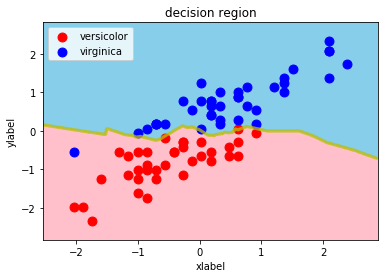

In [263]:
#デフォルト
decision_region(X=X_train_trans, y=y_train, model=knc)

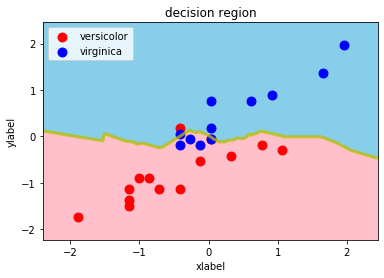

In [268]:
#デフォルト
decision_region(X=X_test_trans, y=y_test, model=knc)

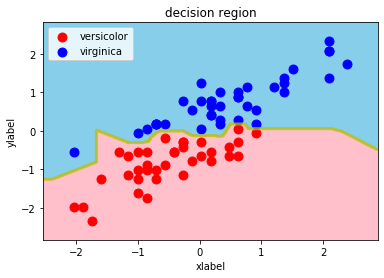

In [266]:
#1
decision_region(X=X_train_trans, y=y_train, model=knc_1)

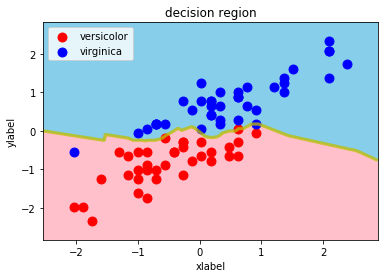

In [267]:
#3
decision_region(X=X_train_trans, y=y_train, model=knc_3)

In [92]:
X_train_trans.shape

(75, 2)

In [230]:
print(y_train.shape)

(75, 1)


In [264]:
#print(yyy)

In [228]:
print(yyy.shape)

(75, 1)


In [265]:
#print(X_train)

## 【問題8】他の手法の学習

#### KNeighborsClassifier K−近傍法

In [269]:
from sklearn.neighbors import KNeighborsClassifier

In [270]:
#インスタンス化
neigh = KNeighborsClassifier()

In [271]:
#学習
neigh.fit(X_train_trans, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [272]:
#予測
Y_pred_k = neigh.predict(X_test_trans)
print(Y_pred_k)

[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]


In [273]:
#評価
score_k = neigh.score(X_test_trans, y_test)
print(score_k)

0.8


In [274]:
print(accuracy_score(y_test, Y_pred_k))
print(precision_score(y_test, Y_pred_k))
print(recall_score(y_test, Y_pred_k))
print(f1_score(y_test, Y_pred_k))
print(confusion_matrix(y_test, Y_pred_k))

0.8
0.7647058823529411
0.9285714285714286
0.8387096774193549
[[13  1]
 [ 4  7]]


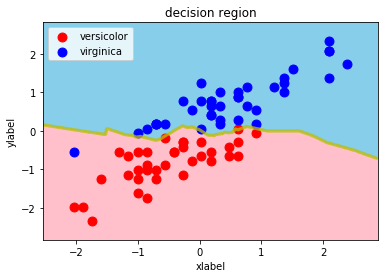

In [276]:
decision_region(X=X_train_trans, y=y_train, model=neigh)

#### ロジスティック回帰

In [277]:
from sklearn.linear_model import LogisticRegression

In [278]:
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train_trans, y_train)

In [279]:
#予測
Y_pred_clf = clf.predict(X_test_trans)

In [280]:
#評価
score_clf = clf.score(X_test_trans, y_test)
print(score_clf)

0.84


In [281]:
print(accuracy_score(y_test, Y_pred_clf))
print(precision_score(y_test, Y_pred_clf))
print(recall_score(y_test, Y_pred_clf))
print(f1_score(y_test, Y_pred_clf))
print(confusion_matrix(y_test, Y_pred_clf))

0.84
0.8125
0.9285714285714286
0.8666666666666666
[[13  1]
 [ 3  8]]


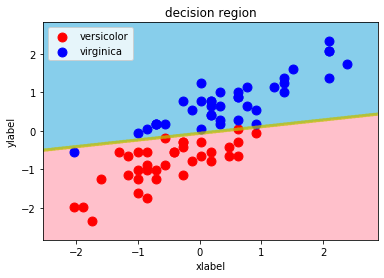

In [282]:
decision_region(X=X_train_trans, y=y_train, model=clf)

#### SVM

In [283]:
from sklearn.svm import SVC

In [284]:
svm = SVC(gamma='auto')

In [285]:
#学習
svm.fit(X_train_trans, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [286]:
#予測
Y_pred_svm = svm.predict(X_test_trans)
print(Y_pred_svm)

[2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]


In [287]:
#評価
score_svm = svm.score(X_test_trans, y_test)
print(score_svm)

0.84


In [288]:
print(accuracy_score(y_test, Y_pred_svm))
print(precision_score(y_test, Y_pred_svm))
print(recall_score(y_test, Y_pred_svm))
print(f1_score(y_test, Y_pred_svm))
print(confusion_matrix(y_test, Y_pred_svm))

0.84
0.8571428571428571
0.8571428571428571
0.8571428571428571
[[12  2]
 [ 2  9]]


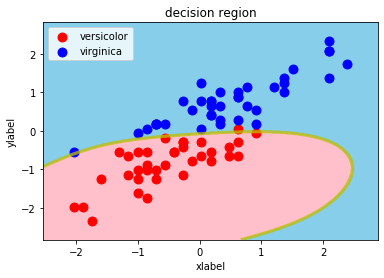

In [289]:
decision_region(X=X_train_trans, y=y_train, model=svm)

#### 決定木

In [290]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [293]:
#学習
dt = DecisionTreeClassifier()

In [294]:
dt.fit(X_train_trans, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [295]:
#予測
Y_pred_dt = dt.predict(X_test_trans)
print(Y_pred_dt)

[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 2]


In [296]:
print(accuracy_score(y_test, Y_pred_dt))
print(precision_score(y_test, Y_pred_dt))
print(recall_score(y_test, Y_pred_dt))
print(f1_score(y_test, Y_pred_dt))
print(confusion_matrix(y_test, Y_pred_dt))

0.84
0.8125
0.9285714285714286
0.8666666666666666
[[13  1]
 [ 3  8]]


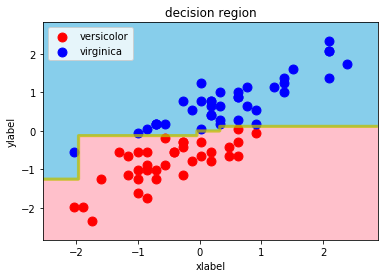

In [298]:
decision_region(X=X_train_trans, y=y_train, model=dt)

#### ランダムフォレスト

In [299]:
from sklearn.ensemble import RandomForestClassifier
#サンプルデータ作成のためのものだったからいらなかった
from sklearn.datasets import make_classification

In [300]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)

In [301]:
#学習
rf.fit(X_train_trans, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [302]:
print(rf.feature_importances_)

[0.29372553 0.70627447]


In [303]:
print(rf.predict(X_test_trans))
Y_pred_rf = rf.predict(X_test_trans)

[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]


In [304]:
#評価
score_rf = rf.score(X_test_trans, y_test)
print(score_rf)

0.8


In [305]:
print(accuracy_score(y_test, Y_pred_rf))
print(precision_score(y_test, Y_pred_rf))
print(recall_score(y_test, Y_pred_rf))
print(f1_score(y_test, Y_pred_rf))
print(confusion_matrix(y_test, Y_pred_rf))

0.8
0.7647058823529411
0.9285714285714286
0.8387096774193549
[[13  1]
 [ 4  7]]


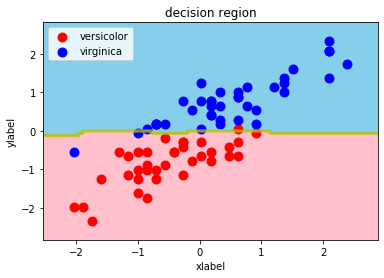

In [307]:
decision_region(X=X_train_trans, y=y_train, model=rf)

## 【問題9】（アドバンス課題）標準化の有無の比較

In [308]:
#1つだけやってみる
#学習
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [309]:
#予測
Y_pred_no_tran = knc.predict(X_test)
print(Y_pred_no_tran)

[2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]


In [310]:
#評価
score = knc.score(X_test, y_test)
print(score)

0.8


In [311]:
#3
print(accuracy_score(y_test, Y_pred_no_tran))
print(precision_score(y_test, Y_pred_no_tran))
print(recall_score(y_test, Y_pred_no_tran))
print(f1_score(y_test, Y_pred_no_tran))
print(confusion_matrix(y_test, Y_pred_no_tran))

0.8
0.7647058823529411
0.9285714285714286
0.8387096774193549
[[13  1]
 [ 4  7]]


In [ ]:
#大して差異なかった